In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['flipgrid2', 'flipgrid']


In [2]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

Using TensorFlow backend.


In [4]:
seed = 128
rng = np.random.RandomState(seed)

In [5]:
root_dir = os.path.abspath('../input')

In [6]:
train = pd.read_csv(os.path.join(root_dir,'flipgrid2/training_set.csv'))
test = pd.read_csv(os.path.join(root_dir, 'flipgrid2/test3.csv'))

In [7]:
train.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_1000651031832.png,78,446,83,422
1,1473231510890DeeplearnS11456.png,73,567,146,351
2,1476881557883Untitled1.png,13,561,124,362
3,1474264827890cobalt-beyond-the-sea-maxi-dress3...,0,640,140,330
4,JPEG_20160711_113321_1000235741992.png,217,442,65,465


pos: 124 530 90 394


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


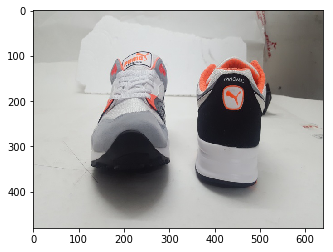

In [8]:
i = random.choice(train.index)

img_name = train.image_name[i]
img = imread(os.path.join(root_dir, 'flipgrid/flipkartgridstage2datasetimages/images', img_name))

print('pos:', train.x1[i], train.x2[i], train.y1[i], train.y2[i])
imshow(img)

In [9]:
from scipy.misc import imresize

temp = []
for img_name in train.image_name:
    img_path = os.path.join(root_dir, 'flipgrid/flipkartgridstage2datasetimages/images', img_name)
    img = imread(img_path)
    img = imresize(img, (64, 64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [10]:
temp = []
for img_name in test.image_name:
    image_path = os.path.join(root_dir, 'flipgrid/flipkartgridstage2datasetimages/images', img_name)
    img = imread(image_path)
    img = imresize(img, (64, 64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [11]:
train_x = train_x / 255.
test_x = test_x / 255.

In [12]:
input_num_units = (64, 64, 3)
hidden_num_units = 5

In [13]:
epochs = 200
batch_size = 20

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [15]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((64,64,3)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)
conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(4, activation="linear")(dense2)

model  = Model(inputs=_input, outputs=output)
model1 = model

In [16]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
__________

In [17]:
train['a'] = train['x2'] - train['x1']
train['b'] = train['y2'] - train['y1']
train['c'] = (train['x2'] + train['x1'])/2
train['d'] = (train['y2'] + train['y1'])/2
train_y = train[['c','d','a','b']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

In [19]:
model1.compile(loss='mae', optimizer='adam', metrics=['mse','mae',])

In [20]:
from keras.callbacks import EarlyStopping

In [21]:
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,  verbose=1,validation_split=0.1,callbacks = [EarlyStopping(monitor='val_mean_absolute_error', patience=160)])

Train on 19440 samples, validate on 2160 samples
Epoch 1/200
19440/19440 [==============================] - 143s 7ms/step - loss: 70.3214 - mean_squared_error: 11745.6205 - mean_absolute_error: 70.3214 - val_loss: 59.4230 - val_mean_squared_error: 7417.9199 - val_mean_absolute_error: 59.4230
Epoch 2/200
19440/19440 [==============================] - 137s 7ms/step - loss: 59.3234 - mean_squared_error: 7719.3184 - mean_absolute_error: 59.3234 - val_loss: 56.4458 - val_mean_squared_error: 6699.0457 - val_mean_absolute_error: 56.4458
Epoch 3/200
19440/19440 [==============================] - 137s 7ms/step - loss: 37.9799 - mean_squared_error: 3669.8366 - mean_absolute_error: 37.9799 - val_loss: 27.4668 - val_mean_squared_error: 2054.4372 - val_mean_absolute_error: 27.4668
Epoch 4/200
19440/19440 [==============================] - 137s 7ms/step - loss: 25.9512 - mean_squared_error: 2097.6327 - mean_absolute_error: 25.9512 - val_loss: 26.0127 - val_mean_squared_error: 1910.4117 - val_mean_ab

In [22]:
predi = model1.predict(X_test)

In [23]:
x1  = predi[:,0] - (predi[:,2]/2)
x2 = predi[:,0] + (predi[:,2]/2)
y1 = predi[:,1] - (predi[:,3]/2)
y2 = predi[:,1] + (predi[:,3]/2)

In [24]:
def iou(box1, box2):
    """Implement the intersection over union (IoU) between box1 and box2
    
    Arguments:
    box1 -- first box, list object with coordinates (x1, y1, x2, y2)
    box2 -- second box, list object with coordinates (x1, y1, x2, y2)
    """
    x11, y11, x12, y12 = box1
    x21, y21, x22, y22 = box2
    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1 and box2. Calculate its Area.
    ### START CODE HERE ### (≈ 5 lines)
    xi1 = max(x11,x21)
    yi1 = max(y11,y21)
    xi2 = min(x12,x22)
    yi2 = min(y12,y22)
    inter_area = max(yi2-yi1,0) * max(xi2-xi1,0)
    ### END CODE HERE ###    

    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    ### START CODE HERE ### (≈ 3 lines)
    box1_area = (y12-y11)*(x12-x11)
    box2_area = (y22-y21)*(x22-x21)
    union_area = box1_area + box2_area - inter_area
    ### END CODE HERE ###
    
    # compute the IoU
    ### START CODE HERE ### (≈ 1 line)
    iou = inter_area/union_area
    ### END CODE HERE ###
    
    return iou

In [25]:
ytest = y_test[['c','d','a','b']].values

In [26]:
x11  = ytest[:,0] - (ytest[:,2]/2)
x12 = ytest[:,0] + (ytest[:,2]/2)
y11 = ytest[:,1] - (ytest[:,3]/2)
y12 = ytest[:,1] + (ytest[:,3]/2)

In [27]:
x11[1]

107.0

In [28]:
box1 = (x11[23], y11[23], x12[23], y12[23])
box2 = (x1[23], y1[23], x2[23], y2[23])
print("iou = " + str(iou(box1, box2)))

iou = 0.9320455773852063


In [29]:
summ = 0
for i in range(len(x1)):
    box1 = (x11[i], y11[i], x12[i], y12[i])
    box2 = (x1[i], y1[i], x2[i], y2[i])
    summ = summ + iou(box1, box2)

In [30]:
summ = summ/len(x1)
summ

0.8743454183021003

In [31]:
'''print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()'''

'print(history.history.keys())\n# "Loss"\nplt.plot(history.history[\'loss\'])\nplt.plot(history.history[\'val_loss\'])\nplt.title(\'model loss\')\nplt.ylabel(\'loss\')\nplt.xlabel(\'epoch\')\nplt.legend([\'train\', \'validation\'], loc=\'upper left\')\nplt.show()'

In [32]:
'''history2 = model2.fit(train_x, train_y2, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'''

'history2 = model2.fit(train_x, train_y2, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'

In [33]:
'''history3 = model3.fit(train_x, train_y3, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'''

'history3 = model3.fit(train_x, train_y3, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'

In [34]:
'''history4 = model4.fit(train_x, train_y4, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'''

'history4 = model4.fit(train_x, train_y4, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)'

In [35]:
'''pred1 = model1.predict(test_x)
pred2 = model2.predict(test_x)
pred3 = model3.predict(test_x)
pred4 = model4.predict(test_x)'''

'pred1 = model1.predict(test_x)\npred2 = model2.predict(test_x)\npred3 = model3.predict(test_x)\npred4 = model4.predict(test_x)'

In [36]:
pred1 = model1.predict(test_x)

In [37]:
min(pred1[:,3])

37.947445

In [38]:
pred1

array([[313.46005, 253.79219, 475.49847, 333.64175],
       [312.1967 , 277.23227, 200.0057 , 300.45587],
       [309.64902, 231.91176, 222.15378, 256.20013],
       ...,
       [340.90396, 248.85295, 452.09515, 298.55237],
       [272.13568, 238.96123, 475.20972, 294.94034],
       [252.50755, 214.11009, 266.39108, 298.96606]], dtype=float32)

In [39]:
x1  = pred1[:,0] - (pred1[:,2]/2)
x2 = pred1[:,0] + (pred1[:,2]/2)
y1 = pred1[:,1] - (pred1[:,3]/2)
y2 = pred1[:,1] + (pred1[:,3]/2)

In [40]:
x1 = [ int(x) for x in x1 ]
x2 = [ int(x) for x in x2 ]
y1 = [ int(x) for x in y1 ]
y2 = [ int(x) for x in y2 ]

In [41]:
for i in range(len(x2)):
    if(x2[i] > 640):
        x2[i] = 640

In [42]:
for i in range(len(y2)):
    if(y2[i] > 500):
        y2[i] = 500

In [43]:
test['x1'] = x1
test['x2'] = x2
test['y1'] = y1
test['y2'] = y2

In [44]:
test.to_csv('submission_flip.csv',index = False)